In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import time 

import concurrent.futures
from numpy import linalg as la
import scipy.cluster.vq as vq
import scipy.ndimage as ndimage
import scipy as sp
import networkx as nx
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.feature_extraction import image
from skimage.color import rgb2gray
import numpy as np
from scipy.spatial.distance import pdist, squareform

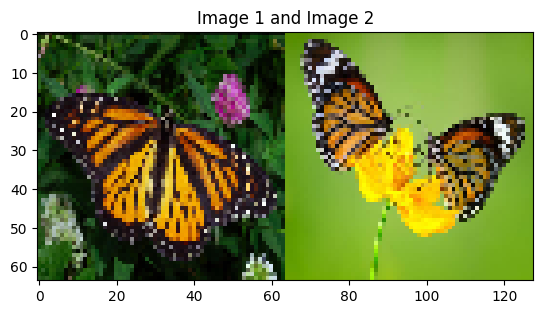

In [8]:
image1_pth = "images/image1.jpg"
image2_pth = "images/image2.jpg"
img1 = cv2.imread(image1_pth)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1, (64,64))
img2 = cv2.imread(image2_pth)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (64,64))
# plt.imshow(img1)
# plt.title("Image 1")
# plt.show()
# plt.imshow(img2)
# plt.title("Image 2")
# plt.show()

img_h = cv2.hconcat([img1, img2])
# Plot the images using Matplotlib
plt.imshow(img_h)
plt.title("Image 1 and Image 2")
plt.show()

In [9]:
def kmeans(image,k=5,iters=100): # expects img in rgb
    img=image.copy()
    h,w,c=img.shape
    orig=image.copy()
    Klusters=np.random.randint(0,255,size=(k,3))
    # print('init clusters', Klusters)
    for it in range(iters):
        img=image.copy()
        for i in range(h):
            for j in range(w):
                pnt=img[i][j]
                diff=np.sqrt(np.sum((Klusters-pnt)**2,axis=1))
                c=np.argmin(diff)
                img[i][j]=Klusters[c]
        loss=0
        l=[]
        for i in range(k):
            Ys,Xs,c=np.where(img==Klusters[i])
            kth_points=orig[Ys,Xs]
            l.append(np.sum(Klusters[i]-kth_points))
            Klusters[i]=np.mean(kth_points,axis=0)
        loss=sum(l)    
        # print('Cluster centroids at iteration-{}'.format(it+1),import numpy as np
    return img


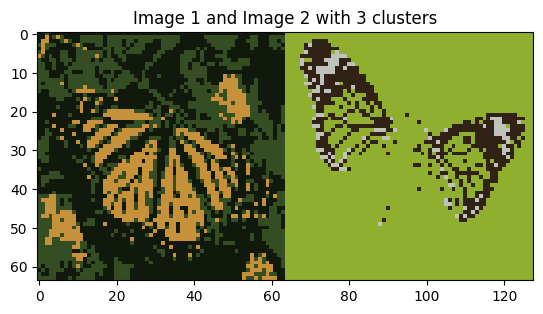

In [10]:
seg_img1_3 = kmeans(img1, 3)
seg_img2_3 = kmeans(img2, 3)
img_h = cv2.hconcat([seg_img1_3, seg_img2_3])
# Plot the images using Matplotlib
plt.imshow(img_h)
plt.title("Image 1 and Image 2 with 3 clusters")
plt.show()

/home/iiticos/Desktop/College/8th sem/CV/Assignment2/.env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/iiticos/Desktop/College/8th sem/CV/Assignment2/.env/lib/python3.10/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/tmp/ipykernel_23870/4241061028.py:21: RuntimeWarning: invalid value encountered in cast
  Klusters[i]=np.mean(kth_points,axis=0)


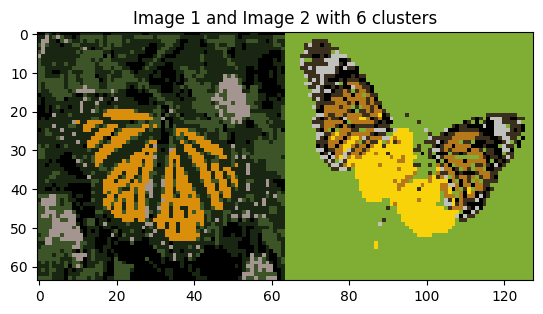

In [11]:
seg_img1_6 = kmeans(img1, 6)
seg_img2_6 = kmeans(img2, 6)
img_h = cv2.hconcat([seg_img1_6, seg_img2_6])
# Plot the images using Matplotlib
plt.imshow(img_h)
plt.title("Image 1 and Image 2 with 6 clusters")
plt.show()

In [14]:
def radio_cut(img,k):
    start = time.time()
    mask = img.astype(bool)
    img = img.astype(float)
    # img += 1 + 0.2 * np.random.randn(*img.shape)
    graph = image.img_to_graph(img, mask=mask)
    # print(graph)
    # graph.data = np.exp(-graph.data / graph.data.std())

    A = graph
    D = np.diag(np.ravel(np.sum(A,axis=1)))
    L = D - A

    # U has matrix of all eigenvectors arranged and l has sorted eigenvalues
    l, U = la.eigh(L)

    means, labels = vq.kmeans2(U[:,1:k], k)
    # print(U.shape)
    # print(means)
    # print(labels.size)
    # print(np.unique(labels))

    label_im = -np.ones(mask.shape)
    label_im[mask] = labels

    # plt.imshow(img)
    # plt.matshow(label_im)
    # plt.show()

    end = time.time()
    print("Time taken for spectral clustering: ", end-start)
    return img, label_im


In [ ]:
images = [img1, img2]
k_val = [3, 6]
imgs = []
label_img = []


with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    results = executor.map(radio_cut, images, k_val)
    for img, label in zip(results[::2], results[1::2]):
        # Append the results to the imgs and label_img lists
        imgs.append(img)
        label_img.append(label)